In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3990 files belonging to 3 classes.
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [3]:
# Load the model
cnn = tf.keras.models.load_model(f"models/animesh.keras")

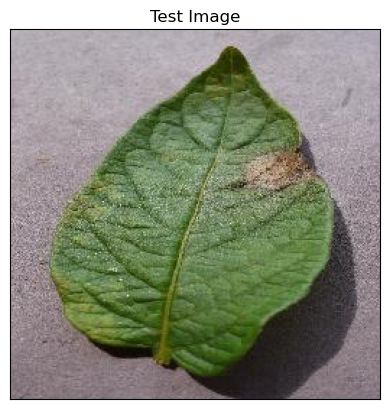

In [9]:

import cv2
image_path ="train/Potato___Late_blight/06554e38-28ce-429d-b8e9-520e61e3c58f___RS_LB 2692.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [11]:
print(predictions)

[[7.9944421e-08 9.9999988e-01 2.0173958e-10]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


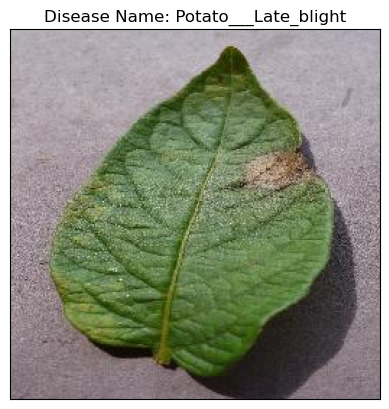

In [13]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()